In [1]:
import torch
from torch.nn import MaxPool2d

In [2]:
input = torch.tensor([[1,2,0,3,1],
                      [0,1,2,3,1],
                      [1,2,1,0,0],
                      [5,2,3,1,1],
                      [2,1,0,1,1]
                     ],dtype=torch.float32)
input

tensor([[1., 2., 0., 3., 1.],
        [0., 1., 2., 3., 1.],
        [1., 2., 1., 0., 0.],
        [5., 2., 3., 1., 1.],
        [2., 1., 0., 1., 1.]])

In [3]:
input = torch.reshape(input,(-1,1,5,5))
input.shape

torch.Size([1, 1, 5, 5])

In [4]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.maxpool1 = MaxPool2d(kernel_size=3,ceil_mode=True)  # ceil_mode 向上取整 ，边缘不够取的也会取
        
    def forward(self,input):
        output = self.maxpool1(input)
        return output

In [5]:
model = Model()

In [6]:
output = model(input)
output

E:\python\anaconda\envs\AI\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


tensor([[[[2., 3.],
          [5., 1.]]]])

In [7]:
from torchvision import datasets,transforms

In [8]:
dataset =datasets.CIFAR10(
    root = "../../../datas",
    train = False,
    transform =transforms.ToTensor(),
    download = True
)

Files already downloaded and verified


In [9]:
from torch.utils.data import DataLoader

In [10]:
dataloader = DataLoader(dataset,batch_size=64)

In [12]:
model2 = Model()

In [13]:
from torch.utils.tensorboard import SummaryWriter

In [14]:
writer = SummaryWriter("./maxpool_logs")
step=1
for data in dataloader:
    imgs,targets = data
    writer.add_images("input",imgs,step)
    output = model2(imgs)
    writer.add_images("out_put",output,step)
    step+=1
writer.close()

E:\python\anaconda\envs\AI\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"


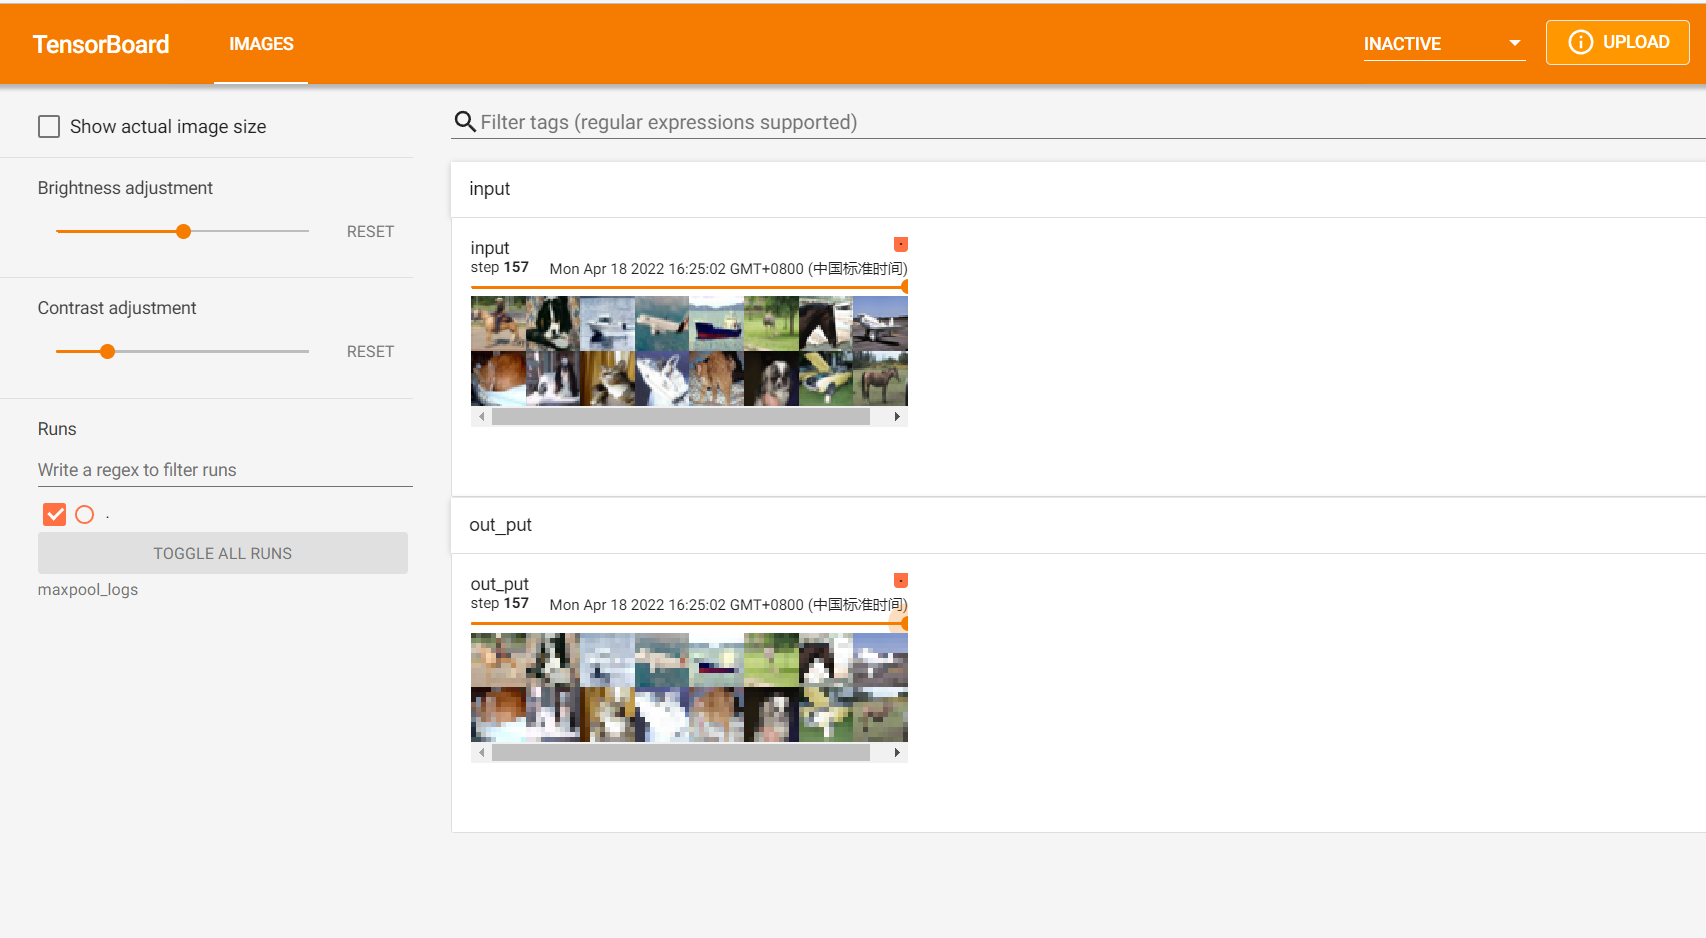